In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('HousePrediction.xlsx')

In [3]:
data.tail()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


# **Task 1: Basic Data Exploration**

### Display all the columns of DataFrame

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

### Read the data and display the first 100 rows


In [5]:
data.head(100)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,60,RL,9765,Corner,1Fam,8,1993,1993,VinylSd,0.0,680.0,185000.0
96,96,20,RL,10264,Inside,1Fam,5,1999,1999,VinylSd,0.0,1588.0,214000.0
97,97,20,RL,10921,Inside,1Fam,5,1965,1965,HdBoard,0.0,960.0,94750.0
98,98,30,RL,10625,Corner,1Fam,5,1920,1950,Wd Sdng,0.0,458.0,83000.0


### Give column insights

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [7]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


# **Task 2: Data Cleaning and Analysis**

### Q1) Checking for Missing Values

In [8]:
data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


### Q2) Features with NAN Values

In [9]:
features_with_nan = [x for x in data.columns if data[x].isnull().sum()>1]
for x in features_with_nan:
    print(x, np.round(data[x].isnull().mean(), 4),  ' % missing values')

MSZoning 0.0014  % missing values
SalePrice 0.4998  % missing values


### Q3) Calculate Mean Sales Price for Missing/Present Information

In [10]:
for x in features_with_nan:
    print(f"Mean Sales Price for Missing {x}: ", data[data[x].isnull()]['SalePrice'].mean())
    print(f"Mean Sales Price for Present {x}: ", data[data[x].notnull()]['SalePrice'].mean())

Mean Sales Price for Missing MSZoning:  nan
Mean Sales Price for Present MSZoning:  180921.19589041095
Mean Sales Price for Missing SalePrice:  nan
Mean Sales Price for Present SalePrice:  180921.19589041095


### Q4) Count of Numerical Features


In [11]:
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
print(f"Number of numerical features: {len(numerical_features)}")
print(f"Numerical features: {numerical_features}")

Number of numerical features: 9
Numerical features: ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']


### Q5) Print the First Five Rows of Numerical Values

In [12]:
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
numerical_data = data[numerical_features]
numerical_data.head()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0


### Q6) Compare the Difference Between Year Features and SalePrice

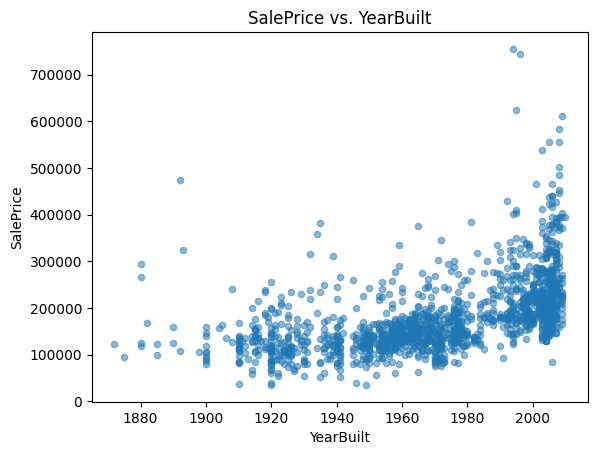

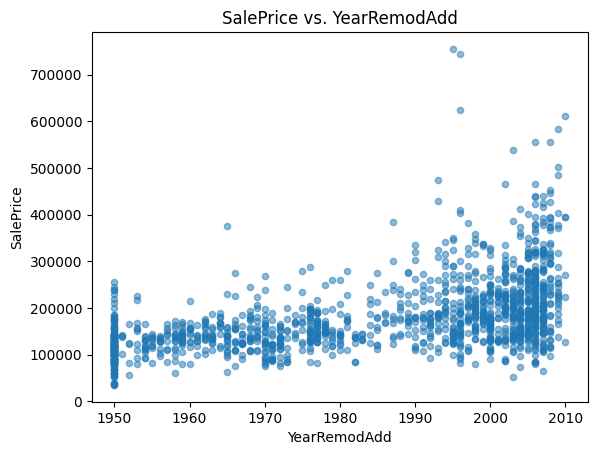

In [13]:
year_features = ['YearBuilt', 'YearRemodAdd']

for feature in year_features:
    data.plot.scatter(x=feature, y='SalePrice', alpha=0.5)
    plt.title(f'SalePrice vs. {feature}')
    plt.show()

### Q7) Relationship Between Discrete Variables and Sales Price

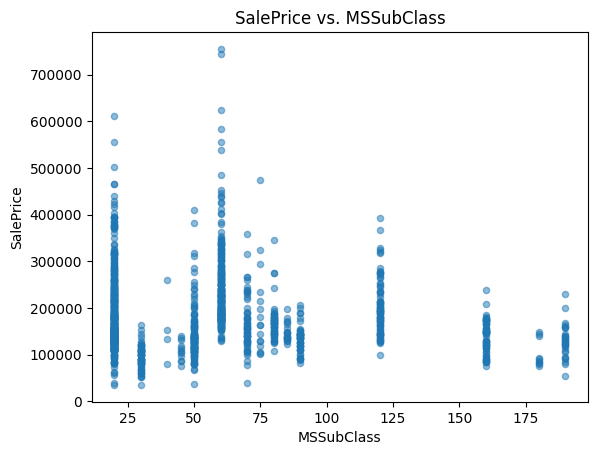

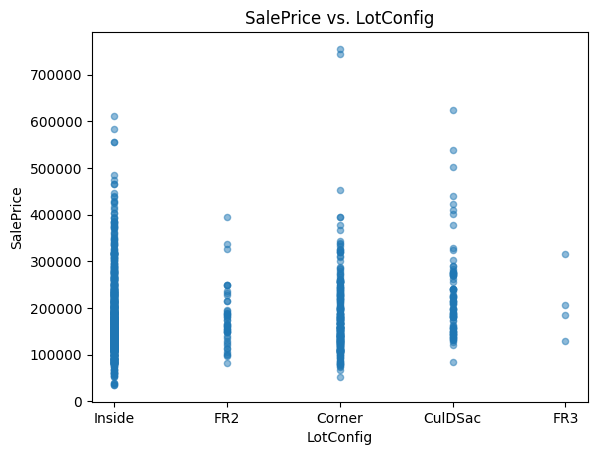

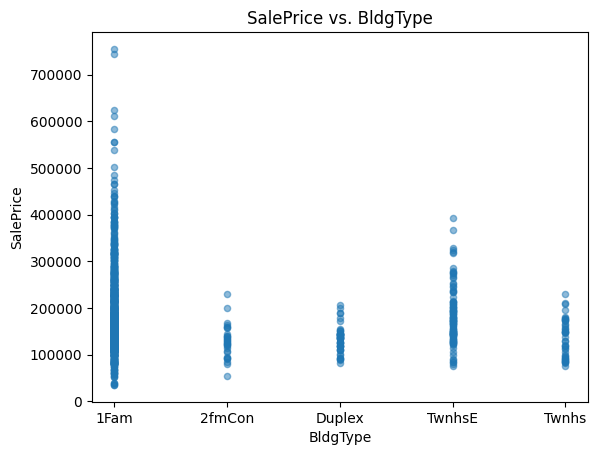

In [14]:
discrete_features = ['MSSubClass','LotConfig','BldgType']

for feature in discrete_features:
    data.plot.scatter(x=feature, y='SalePrice', alpha=0.5)
    plt.title(f'SalePrice vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

### Q8) Relationship Between Continuous Variables and Sales Price

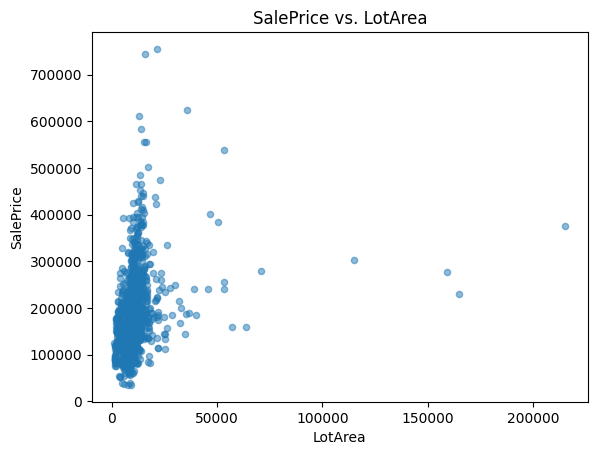

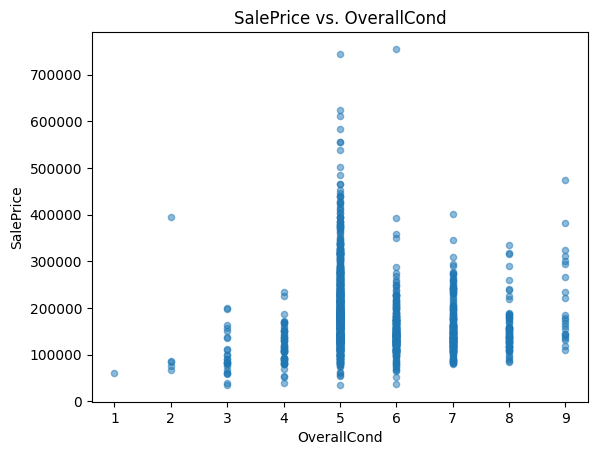

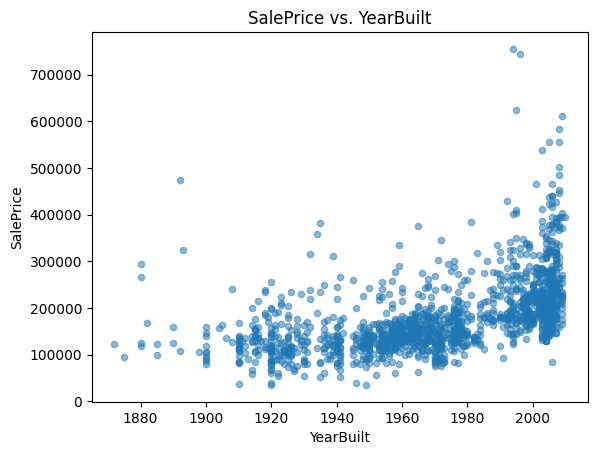

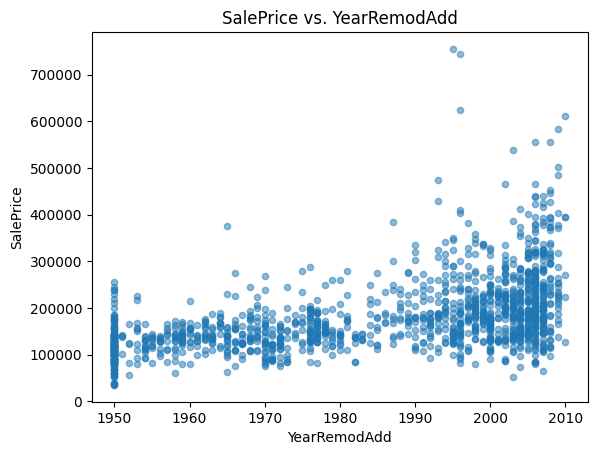

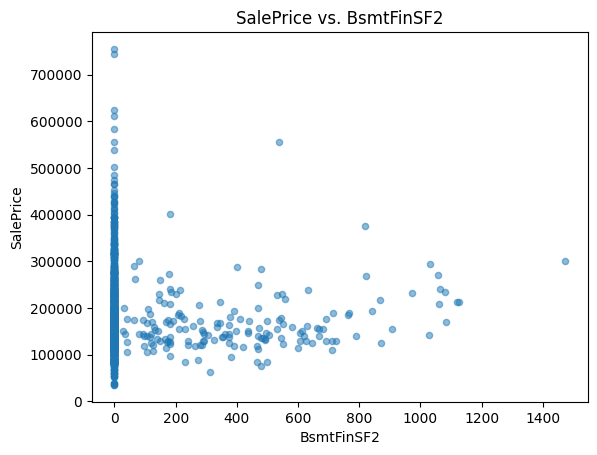

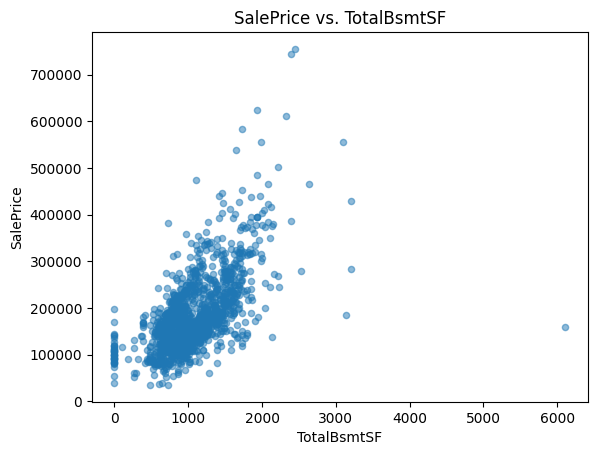

In [15]:
continuous_features = ['LotArea','OverallCond','YearBuilt','YearRemodAdd','BsmtFinSF2','TotalBsmtSF']

for feature in continuous_features:
    data.plot.scatter(x=feature, y='SalePrice', alpha=0.5)
    plt.title(f'SalePrice vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

### Q9) Histogram Analysis for Continuous Variables

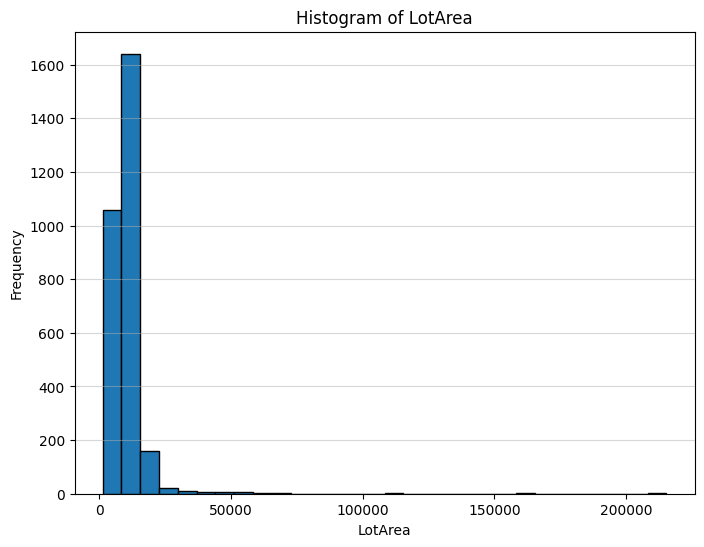

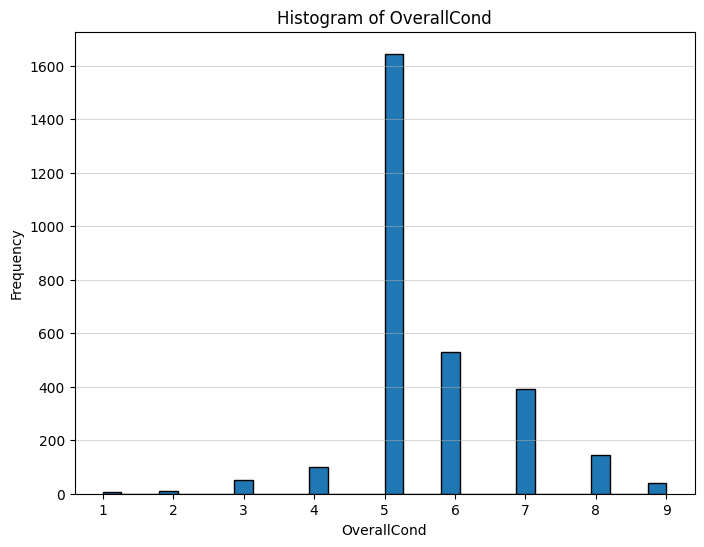

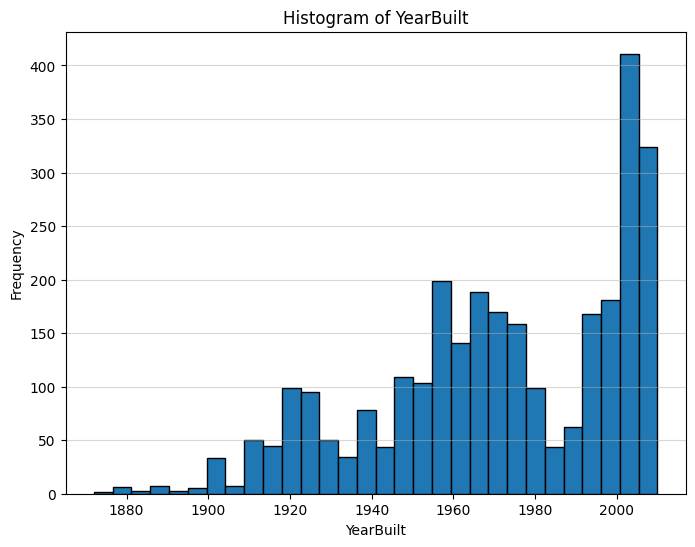

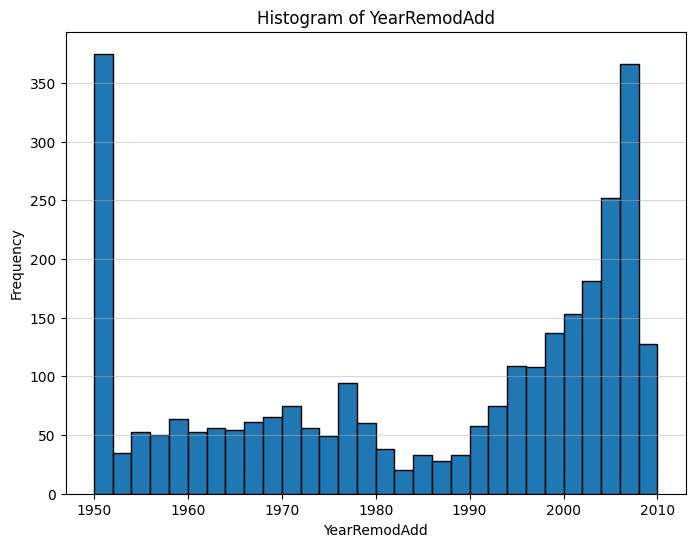

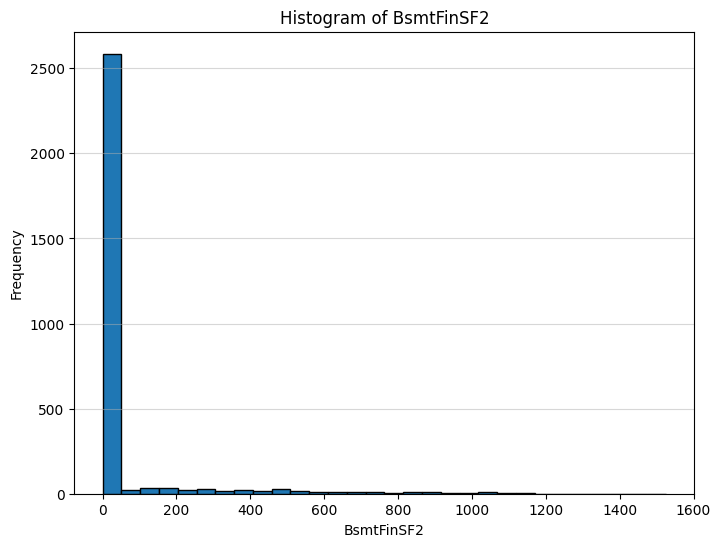

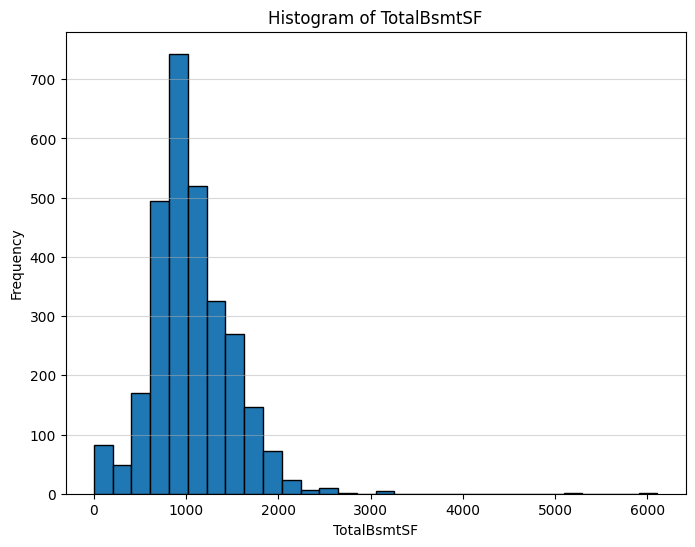

In [16]:
continuous_features = ['LotArea','OverallCond','YearBuilt','YearRemodAdd','BsmtFinSF2','TotalBsmtSF']

for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    plt.hist(data[feature], bins=30, edgecolor='k')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

### Q10) Logarithmic Transformation

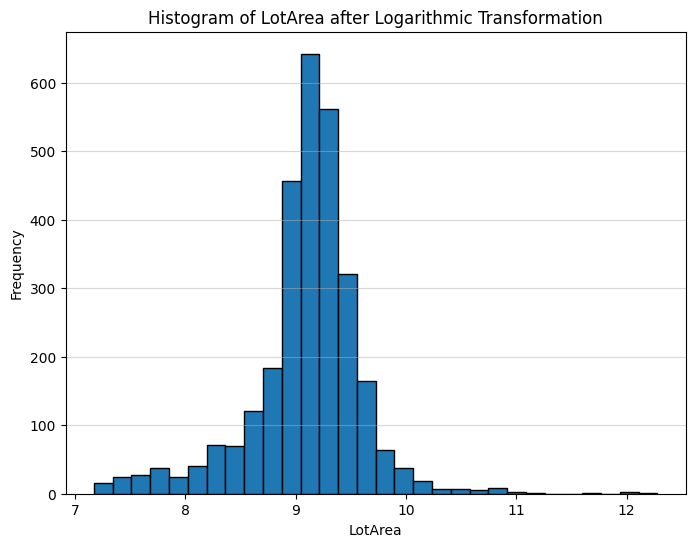

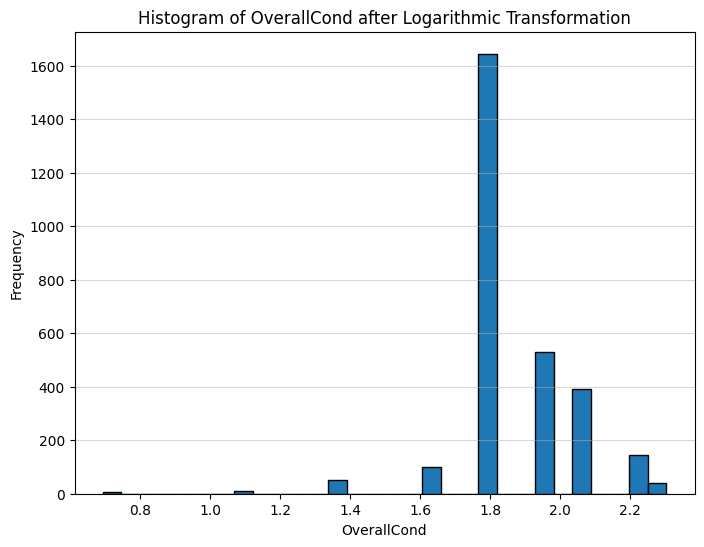

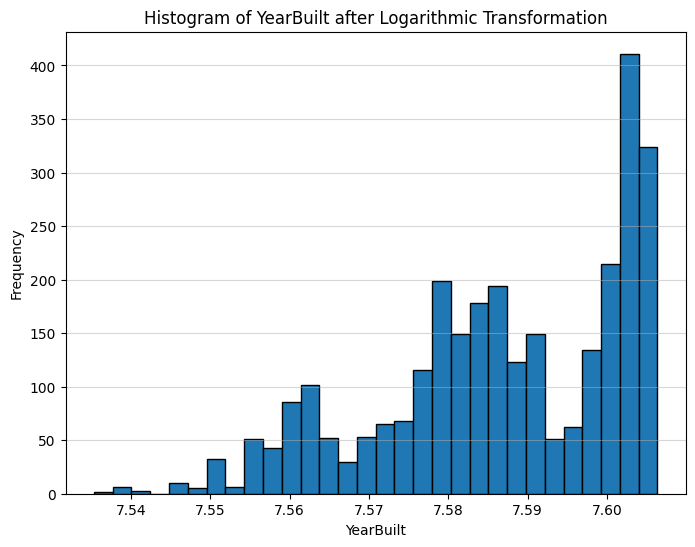

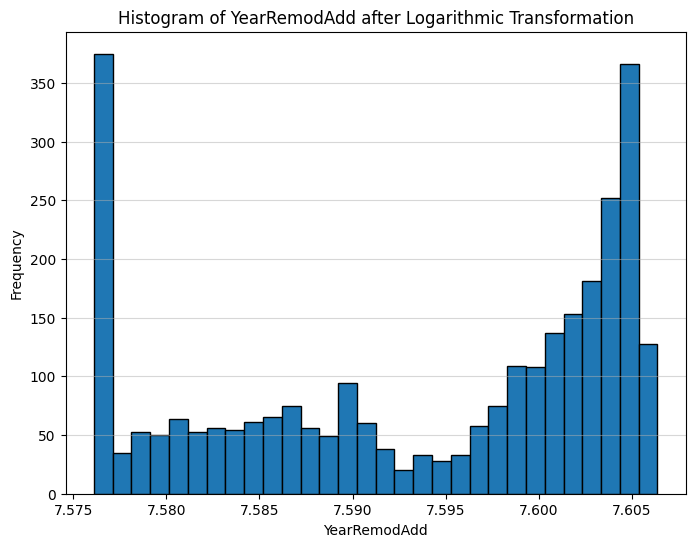

Skipping log transformation for BsmtFinSF2 due to zero or negative values.
Skipping log transformation for TotalBsmtSF due to zero or negative values.


In [17]:
for feature in continuous_features:
    if (data[feature] <= 0).any():
        print(f"Skipping log transformation for {feature} due to zero or negative values.")
        continue

    data[feature] = np.log1p(data[feature])

    plt.figure(figsize=(8, 6))
    plt.hist(data[feature], bins=30, edgecolor='k')
    plt.title(f'Histogram of {feature} after Logarithmic Transformation')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

# **Task 3: Feature Engineering and Advanced Analysis**

### Q1) Find Outliers

Outliers in SalePrice:
        Id  MSSubClass MSZoning    LotArea LotConfig BldgType  OverallCond  \
11      11          60       RL   9.386392    Inside     1Fam     1.791759   
53      53          20       RL  10.825204    Inside     1Fam     1.791759   
58      58          60       RL   9.523909   CulDSac     1Fam     1.791759   
112    112          60       RL   9.206935    Inside     1Fam     1.791759   
151    151          20       RL   9.539068    Inside     1Fam     1.791759   
...    ...         ...      ...        ...       ...      ...          ...   
1268  1268          50       RL   9.554001    Inside     1Fam     2.302585   
1353  1353          50       RL   9.597030   CulDSac     1Fam     1.791759   
1373  1373          20       RL   9.341456    Inside     1Fam     1.791759   
1388  1388          20       RL   9.608647   CulDSac     1Fam     1.791759   
1437  1437          20       RL   9.429074       FR2     1Fam     1.791759   

      YearBuilt  YearRemodAdd Exterior1s

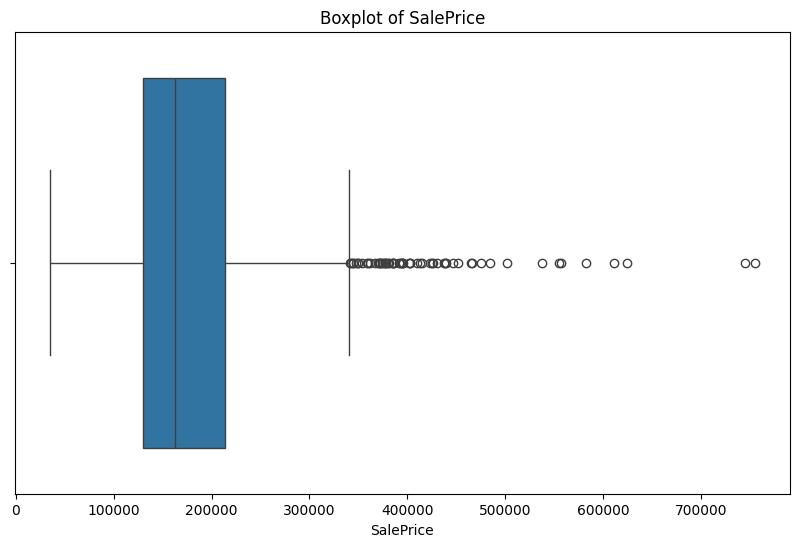

In [18]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_saleprice = find_outliers_iqr(data, 'SalePrice')
print("Outliers in SalePrice:")
print(outliers_saleprice)

outliers_lotarea = find_outliers_iqr(data, 'LotArea')
print("\nOutliers in LotArea:")
print(outliers_lotarea)

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.show()

### Q2) Relationship Between Categorical Features and SalePrice

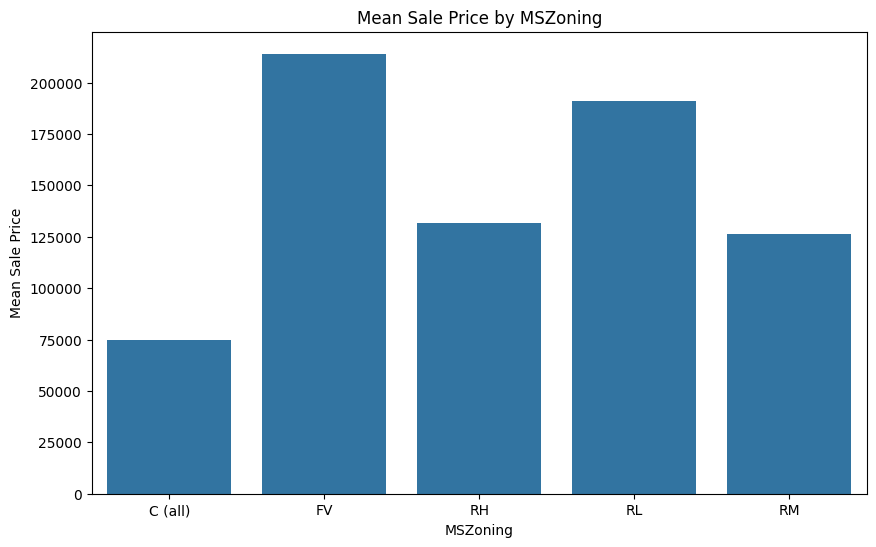

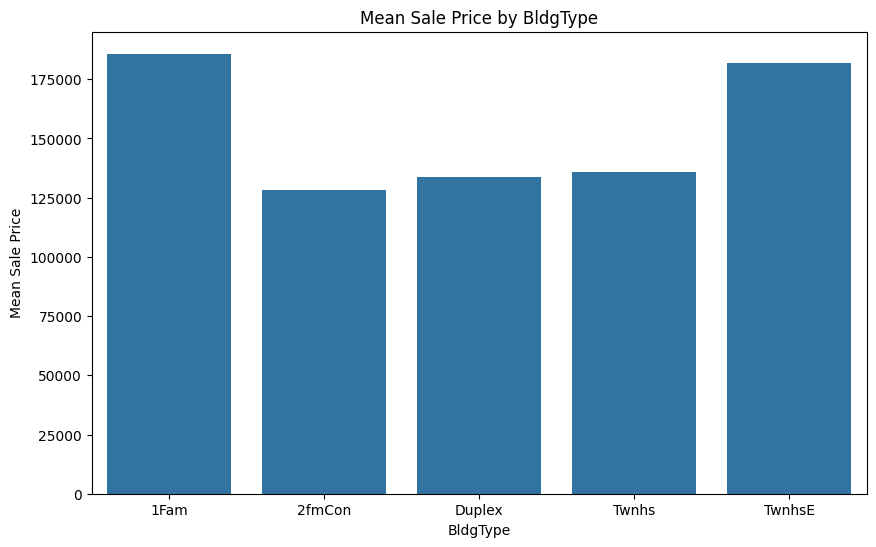

In [19]:
mszoning_grouped = data.groupby('MSZoning')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='MSZoning', y='SalePrice', data=mszoning_grouped)
plt.title('Mean Sale Price by MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Mean Sale Price')
plt.show()

bldgtype_grouped = data.groupby('BldgType')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='BldgType', y='SalePrice', data=bldgtype_grouped)
plt.title('Mean Sale Price by BldgType')
plt.xlabel('BldgType')
plt.ylabel('Mean Sale Price')
plt.show()

### Q3) Correlation Between Numerical Features and SalePrice

In [20]:
numeric_data = data.select_dtypes(include=['number', 'float64', 'int64'])

correlation_matrix = numeric_data.corr()
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(correlation_with_saleprice)

SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.520575
YearRemodAdd    0.506848
LotArea         0.388528
BsmtFinSF2     -0.011378
Id             -0.021917
OverallCond    -0.053177
MSSubClass     -0.084284
Name: SalePrice, dtype: float64


### Q4) Continuous Features vs. SalePrice

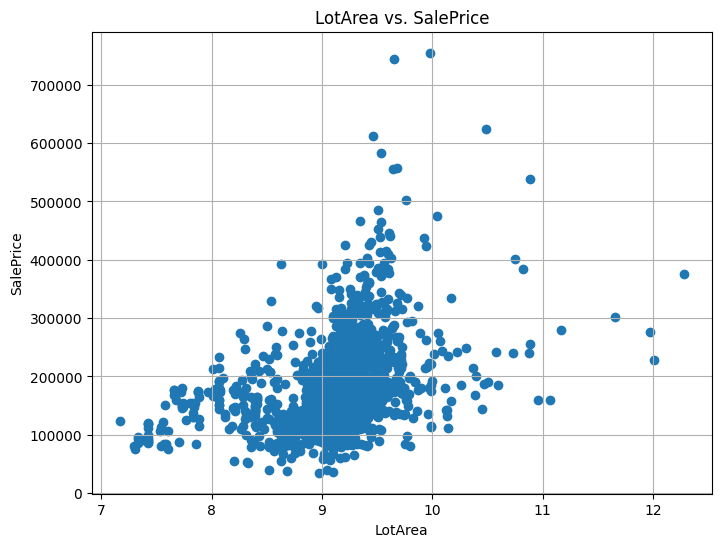

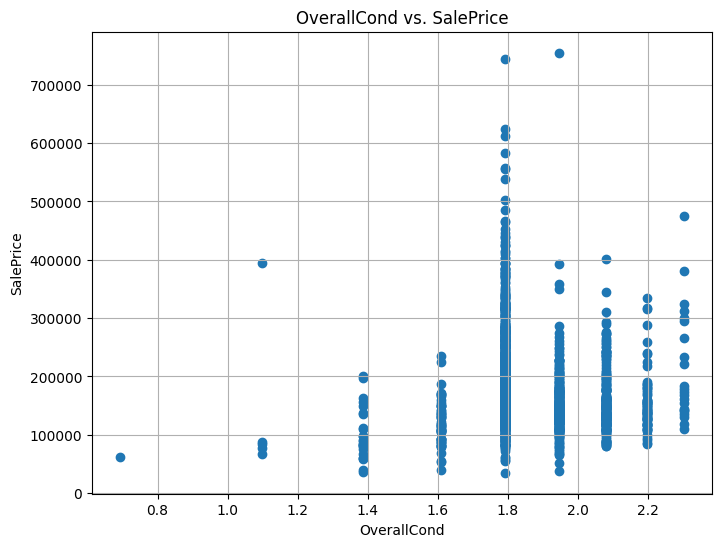

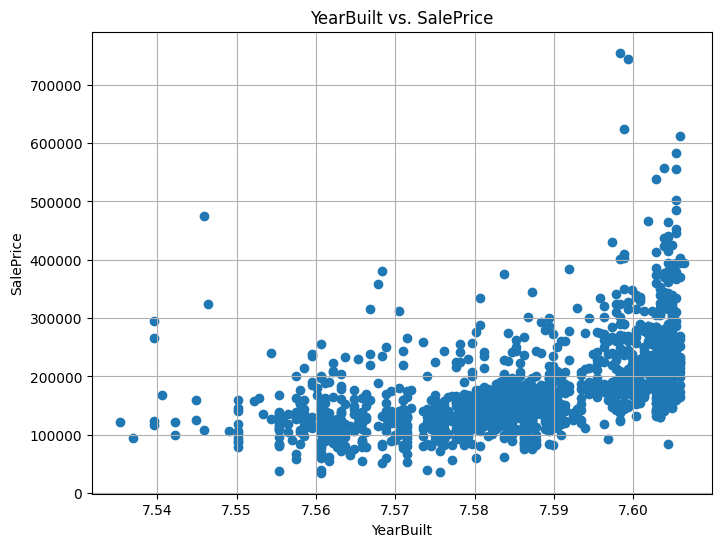

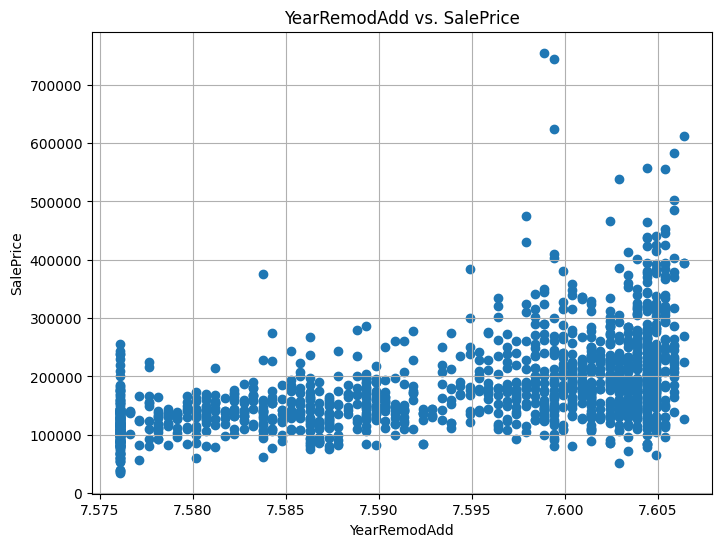

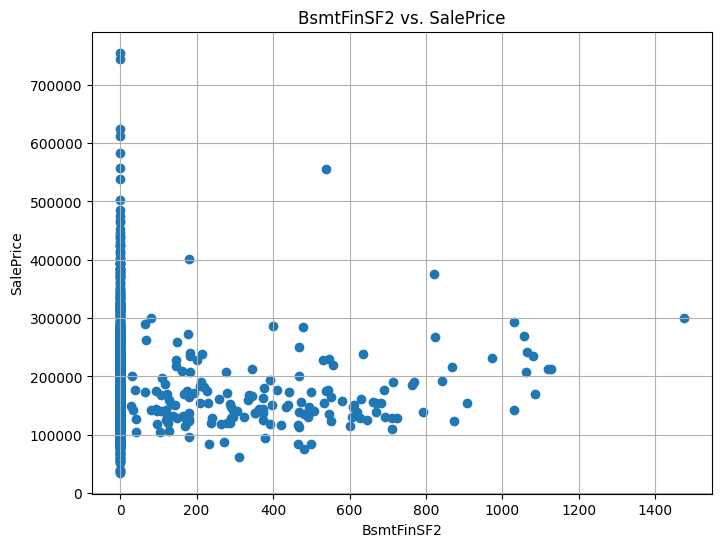

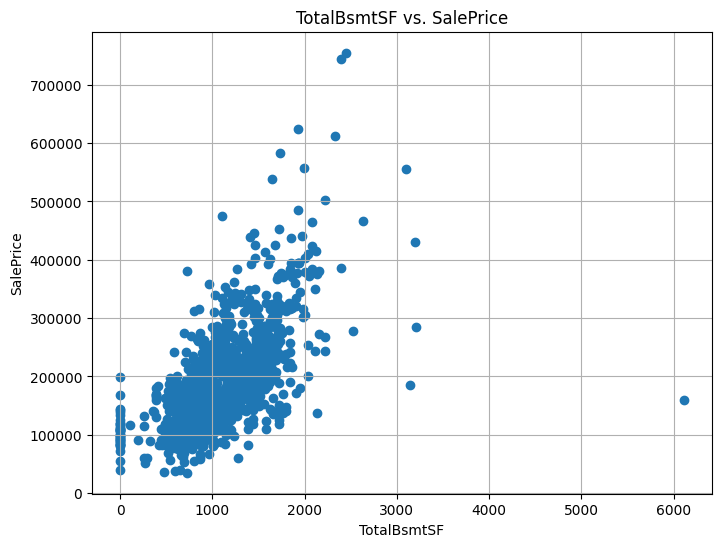

In [21]:
continuous_features = ['LotArea','OverallCond','YearBuilt','YearRemodAdd','BsmtFinSF2','TotalBsmtSF']

for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs. SalePrice')
    plt.grid(True)
    plt.show()

### Q5) Feature Engineering

#### Handle Missing Values:

In [22]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])

data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mode()[0])

data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mode()[0])

In [23]:
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())

In [24]:
data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0


#### Handle Categorical Variables:

In [25]:
import pandas as pd

data = {'MSZoning': ['RL', 'RM', 'C (Commercial)', 'FV', 'RL']}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df['MSZoning'], prefix='MSZoning')

df = pd.concat([df, df_encoded], axis=1)
df

,MSZoning,MSZoning_C (Commercial),MSZoning_FV,MSZoning_RL,MSZoning_RM
0,RL,False,False,True,False
1,RM,False,False,False,True
2,C (Commercial),True,False,False,False
3,FV,False,True,False,False
4,RL,False,False,True,False


In [26]:
import pandas as pd

data = {'Exterior1st': ['VinylSd', 'Wd Sdng', 'HdBoard', 'VinylSd', 'Plywood']}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st')

df = pd.concat([df, df_encoded], axis=1)
df

,Exterior1st,Exterior1st_HdBoard,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng
0,VinylSd,False,False,True,False
1,Wd Sdng,False,False,False,True
2,HdBoard,True,False,False,False
3,VinylSd,False,False,True,False
4,Plywood,False,True,False,False


In [27]:
data = {'BldgType': ['1Fam', '2FmCon', 'Duplex', '1Fam', 'TwnhsE']}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df['BldgType'], prefix='BldgType')

df = pd.concat([df, df_encoded], axis=1)
df

,BldgType,BldgType_1Fam,BldgType_2FmCon,BldgType_Duplex,BldgType_TwnhsE
0,1Fam,True,False,False,False
1,2FmCon,False,True,False,False
2,Duplex,False,False,True,False
3,1Fam,True,False,False,False
4,TwnhsE,False,False,False,True


In [28]:
data = {'LotConfig': ['Inside', 'Corner', 'CulDSac', 'Inside', 'Corner']}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df['LotConfig'], prefix='LotConfig')

df = pd.concat([df, df_encoded], axis=1)
df

,LotConfig,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside
0,Inside,False,False,True
1,Corner,True,False,False
2,CulDSac,False,True,False
3,Inside,False,False,True
4,Corner,True,False,False


In [29]:
df.head()

,LotConfig,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside
0,Inside,False,False,True
1,Corner,True,False,False
2,CulDSac,False,True,False
3,Inside,False,False,True
4,Corner,True,False,False


#### Handling Temporal Variables:


In [30]:
dt = pd.read_excel('HousePrediction.xlsx')

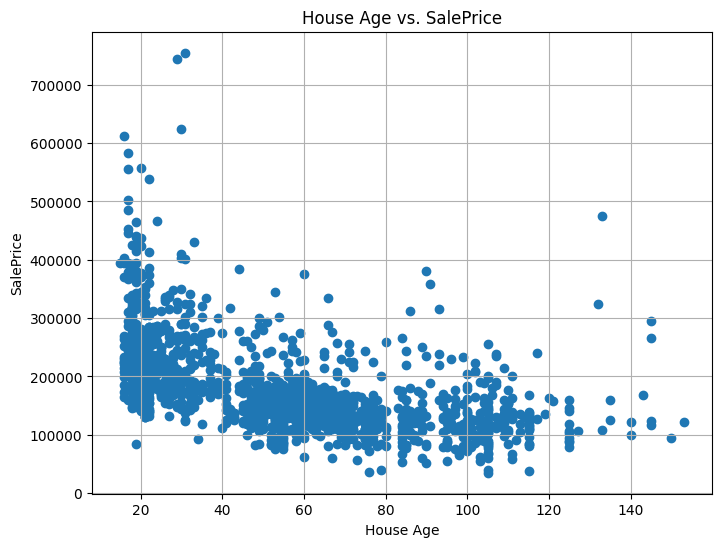

In [31]:
current_year = pd.Timestamp.now().year
dt['HouseAge'] = current_year - dt['YearBuilt']

plt.figure(figsize=(8, 6))
plt.scatter(dt['HouseAge'], dt['SalePrice'])
plt.xlabel('House Age')
plt.ylabel('SalePrice')
plt.title('House Age vs. SalePrice')
plt.grid(True)
plt.show()

dt['IsNewHouse'] = dt['HouseAge'] < 10